In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

# Read Data

In [2]:
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Exploratory Data analysis

In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.duplicated().sum()

0

* data has no duplicated values  
* data has no nulls 

In [6]:
data.drop('Id',axis = 1, inplace = True)

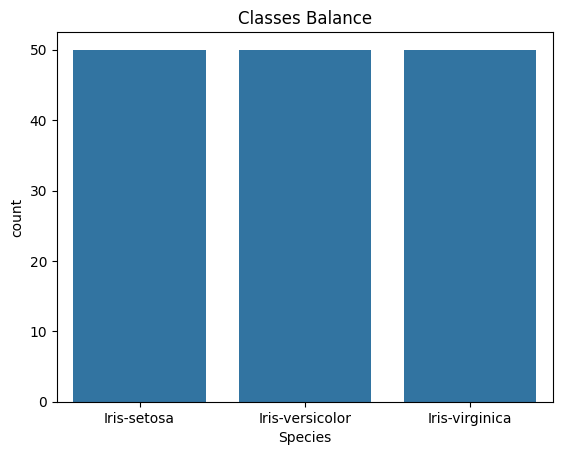

In [7]:
target = data['Species'].value_counts()
plt.title('Classes Balance')
sns.barplot(target)
plt.show()

* data is balance which number of raw for every class is equal

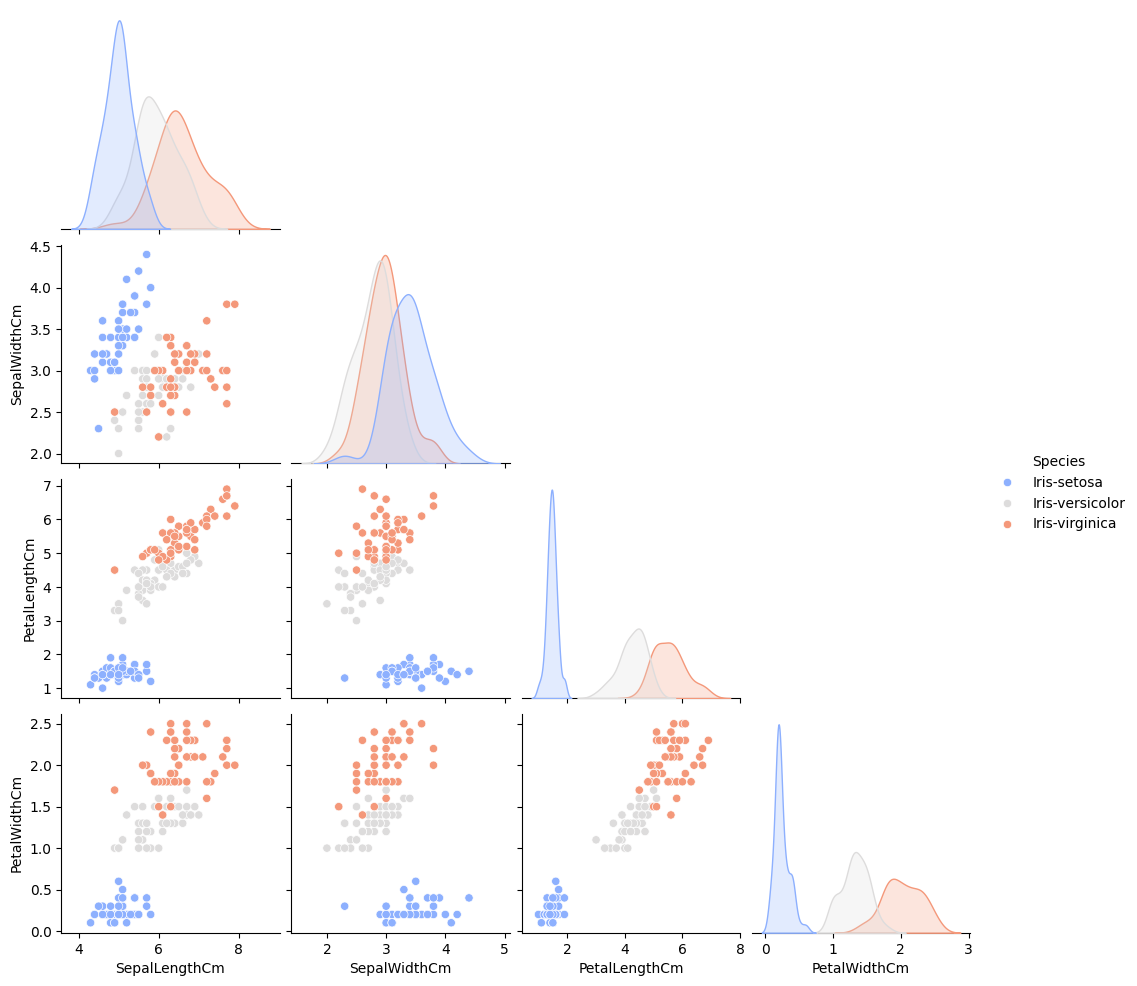

In [8]:
sns.pairplot(data,hue = 'Species',diag_kind='kde',corner=True,palette = 'coolwarm')
plt.show()

# Data Preprocessing

In [9]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

In [10]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
data['Species'].unique()

array([0, 1, 2])

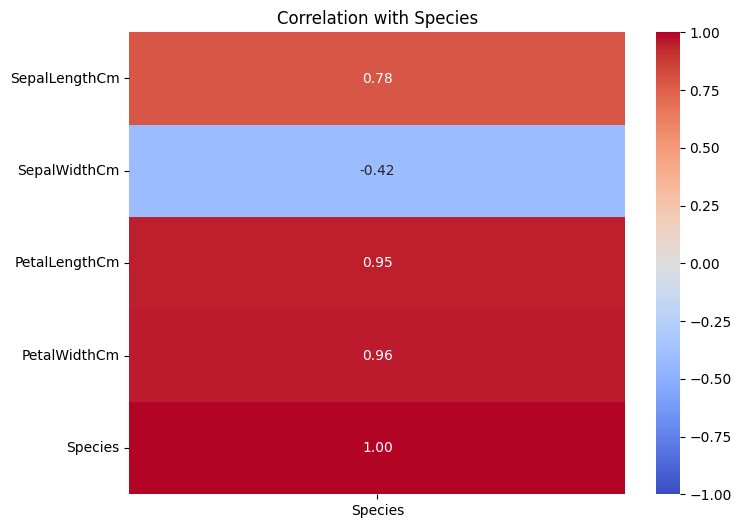

In [11]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr[['Species']],annot=True,cmap='coolwarm',fmt = '.2f',vmin = -1,vmax = 1)
plt.title('Correlation with Species')
plt.show()

* there are a correlation between every feature and target feature (Spacies)

# Split data

In [12]:
x = data.drop('Species',axis=1)
y = data['Species']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((120, 4), (120,), (30, 4), (30,))

# Model 1 
### - Logistic Regression

 $$
y = \frac{1}{1+e^{-x}}
 $$

In [26]:
def plot_cm(cm):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [29]:
def Modeling(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('Accuracy:',accuracy_score(ytest,ypred))
    print('Precision:',precision_score(ytest,ypred,average='macro'))
    print('Recall:',recall_score(ytest,ypred,average='macro'))
    print('Classisfication reprort:',classification_report(ytest,ypred))
    cm = confusion_matrix(ytest,ypred)
    plot_cm(cm)
    

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classisfication reprort:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



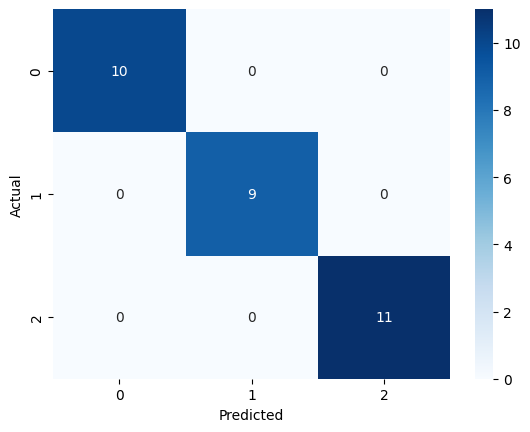

In [30]:
lr = LogisticRegression()
Modeling(lr)

# Model 2 
## - Random Forest 
- model generate multibles trees to train data 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classisfication reprort:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



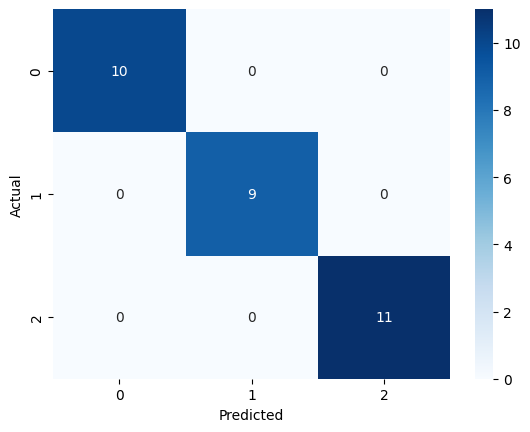

In [31]:
rfc = RandomForestClassifier(n_estimators=50,random_state=42)
Modeling(rfc)

- in this data two models do well in learning 